%matplotlib inline
%load_ext autoreload

Using TensorFlow backend.


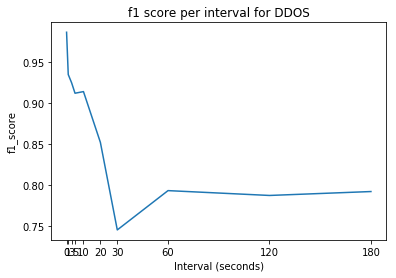

In [2]:
# Plotting the f1_score for each interval for DDOS attacks

from botnet_detection import get_plots_for_each_interval
from plot_features import plot_f1_per_interval

# Get files containing each aggregated files.
intervals = [0.01, 1, 3, 5, 10, 20, 30, 60, 120, 180]
files = ['minute_aggregated/ddos-{}s.featureset.csv'.format(interval) for interval in intervals]

# Run each file through machine learning and get f1_scores of each
f1_scores = get_plots_for_each_interval('ddos', intervals)

# Now plot these scores
plot_f1_per_interval(f1_scores, 'f1 score per interval for DDOS', intervals)

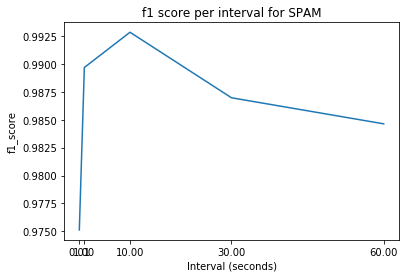

In [6]:
# Get files containing each aggregated files.
intervals = [0.01, 1, 10, 30.0, 60.0]

# Run each file through machine learning and get f1_scores of each
f1_scores = get_plots_for_each_interval('spam', intervals)

# Now plot these scores
plot_f1_per_interval(f1_scores, 'f1 score per interval for SPAM', intervals)

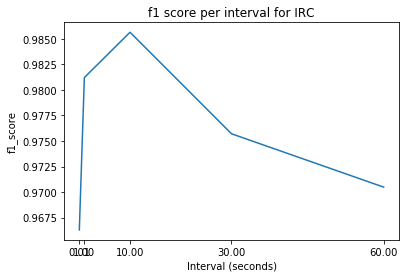

In [7]:
intervals = [0.01, 1, 10, 30.0, 60.0]

# Run each file through machine learning and get f1_scores of each
f1_scores = get_plots_for_each_interval('irc', intervals)

# Now plot these scores
plot_f1_per_interval(f1_scores, 'f1 score per interval for IRC', intervals)

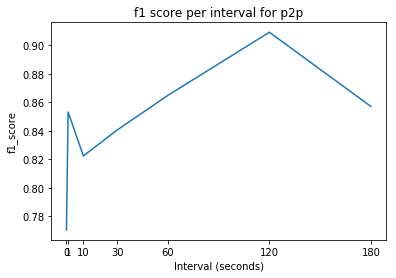

In [23]:
intervals = [0.01, 1.0, 10.0, 30.0, 60.0, 120.0, 180.0]

# Run each file through machine learning and get f1_scores of each
f1_scores = get_plots_for_each_interval('p2p', intervals)

# Now plot these scores
plot_f1_per_interval(f1_scores, 'f1 score per interval for p2p', intervals)

# Comparing amount of Random Forest Estimators

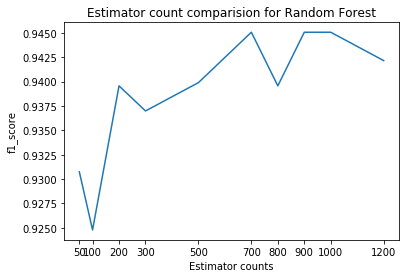

In [16]:
# For testing optimal amount of Random Forest estimators.
from botnet_detection import rf_compare_estimator_counts, get_specific_features_from
from plot_features import plot_rf_estimators

plot_rf_estimators(rf_compare_estimator_counts(*get_specific_features_from('minute_aggregated/ddos-10s.featureset.csv')), 'Estimator count comparision for Random Forest')

**700** Seems the most optimal based on multiple runs

In [26]:
# Preparing things for the rest of the code here.

from botnet_detection import summary_of_detection, dl_test_dict, test_dict, dl_train, rf_train, dt_train, get_roc_metrics, get_specific_features_from
from utils import best_features
from plot_features import plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import confusion_matrix

attack_types = ['spam', 'irc']
files = ['minute_aggregated/{}-10s.featureset.csv'.format(attack) for attack in attack_types]
files += ['minute_aggregated/ddos-0.01s.featureset.csv']
files += ['minute_aggregated/p2p-120.0s.featureset.csv']

# Machine learning results for each attack (0.01s)

Results for minute_aggregated/spam-10s.featureset.csv
Accuracy: 0.99, Recall: 0.99, Precision: 0.99, f1_score: 0.99 



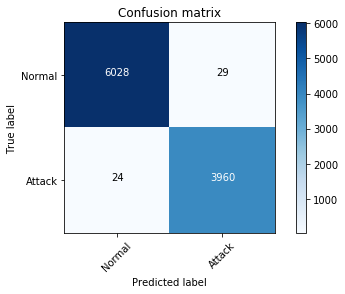

Results for minute_aggregated/irc-10s.featureset.csv
Accuracy: 0.99, Recall: 0.99, Precision: 0.99, f1_score: 0.99 



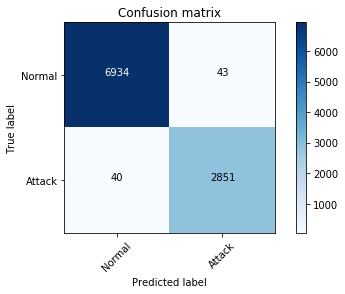

Results for minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 0.98, Recall: 0.99, Precision: 0.98, f1_score: 0.99 



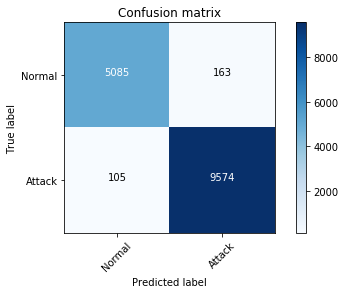

Results for minute_aggregated/p2p-120.0s.featureset.csv
Accuracy: 0.83, Recall: 0.83, Precision: 1.00, f1_score: 0.91 



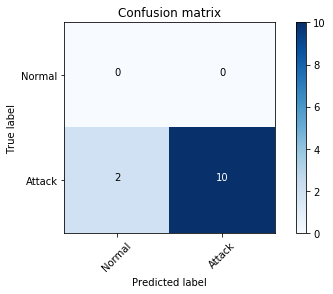

In [27]:
# Machine learning results for each attack type for 10 second intervals for random forest.

for f in files:
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, best_features())
    clf = rf_train(xtrain, ytrain)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}, f1_score: {f1_score:.2f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

For Decision Trees

Results for minute_aggregated/spam-10s.featureset.csv
Accuracy: 0.99, Recall: 0.99, Precision: 0.99, f1_score: 0.99 



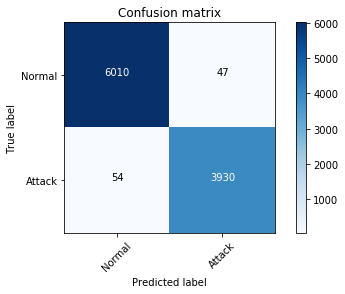

Results for minute_aggregated/irc-10s.featureset.csv
Accuracy: 0.98, Recall: 0.97, Precision: 0.97, f1_score: 0.97 



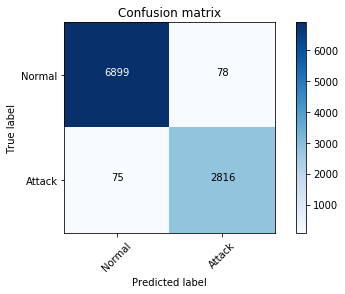

Results for minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 0.98, Recall: 0.99, Precision: 0.98, f1_score: 0.99 



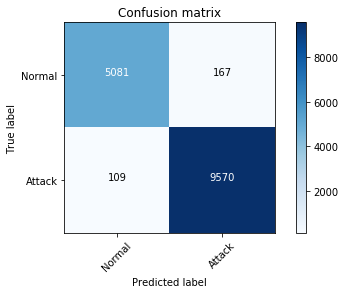

Results for minute_aggregated/p2p-120.0s.featureset.csv
Accuracy: 0.83, Recall: 0.83, Precision: 1.00, f1_score: 0.91 



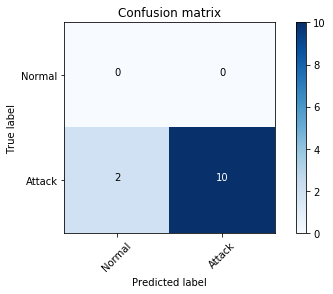

In [28]:
print('For Decision Trees\n')
for f in files:
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, best_features())
    clf = dt_train(xtrain, ytrain)
    results = test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}, f1_score: {f1_score:.2f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

For Deep Learning

Results for minute_aggregated/spam-10s.featureset.csv
Accuracy: 0.97, Recall: 0.97, Precision: 0.96, f1_score: 0.97 



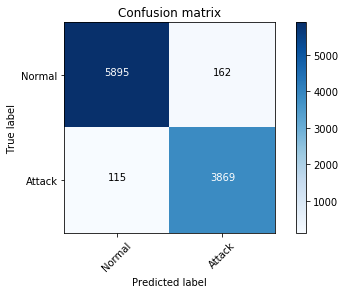

Results for minute_aggregated/irc-10s.featureset.csv
Accuracy: 0.91, Recall: 0.99, Precision: 0.77, f1_score: 0.87 



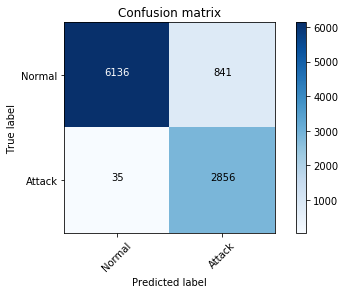

Results for minute_aggregated/ddos-0.01s.featureset.csv
Accuracy: 0.91, Recall: 0.98, Precision: 0.90, f1_score: 0.94 



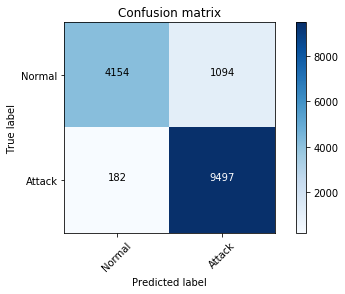

Results for minute_aggregated/p2p-120.0s.featureset.csv
Accuracy: 1.00, Recall: 1.00, Precision: 1.00, f1_score: 1.00 



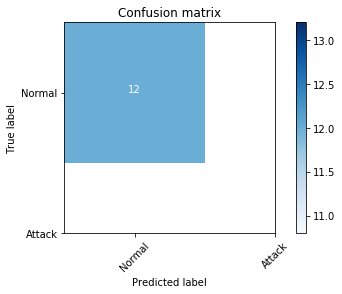

In [29]:
print('For Deep Learning\n')
for f in files:
    print("Results for {}".format(f))
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, best_features())
    clf = dl_train(xtrain, ytrain)
    results = dl_test_dict(clf, xtest, ytest)
    print('Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}, f1_score: {f1_score:.2f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal', 'Attack'])

# ROC curves for each attack and model

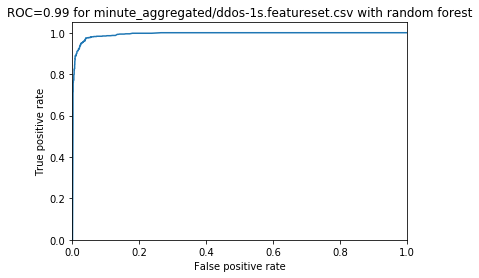

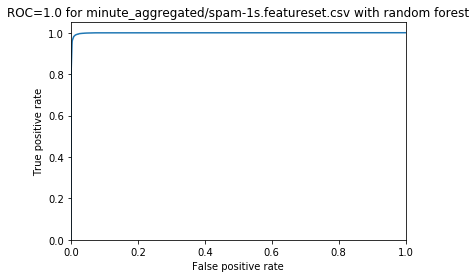

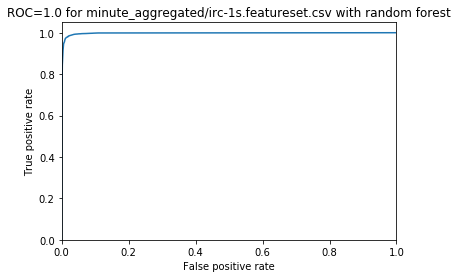

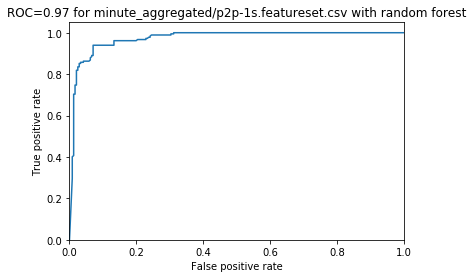

In [22]:
# ROC curves for Random Forest

for f in files:
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, best_features())
    clf = rf_train(xtrain, ytrain)
    fpr, tpr, auc = get_roc_metrics(clf, xtest, ytest)
    plot_roc_curve(fpr, tpr, auc, '{} with random forest'.format(f))
    

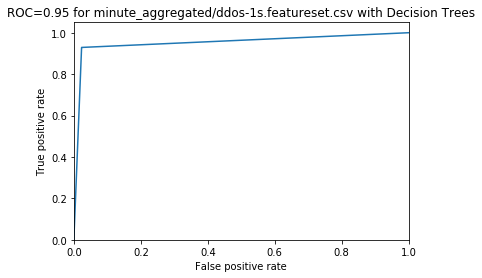

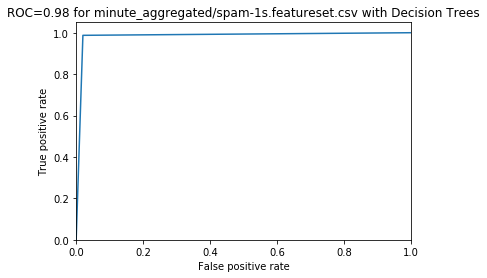

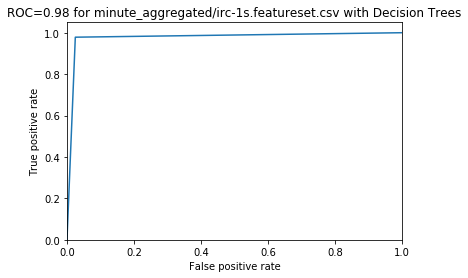

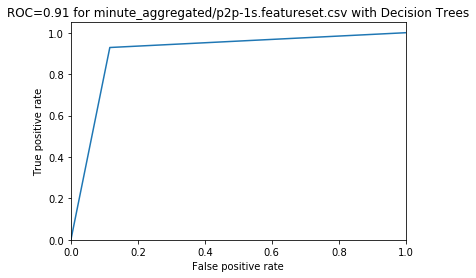

In [23]:
# For decision trees

for f in files:
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, best_features())
    clf = dt_train(xtrain, ytrain)
    fpr, tpr, auc = get_roc_metrics(clf, xtest, ytest)
    plot_roc_curve(fpr, tpr, auc, '{} with Decision Trees'.format(f))

 32/988 [..............................] - ETA: 3s

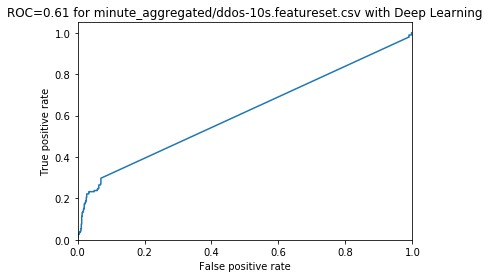

 9568/10041 [===========================>..] - ETA: 0s

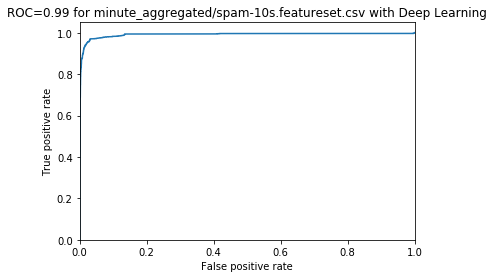

9344/9868 [===========================>..] - ETA: 0s

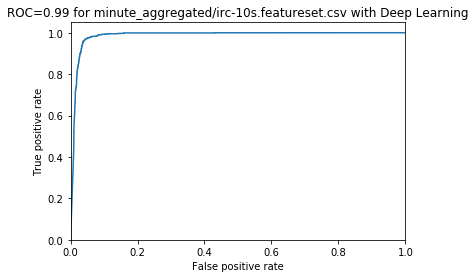

 32/132 [======>.......................] - ETA: 0s

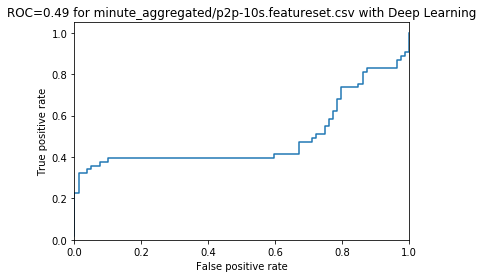

In [4]:
# For Deep Learning

for f in files:
    xtrain, xtest, ytrain, ytest = get_specific_features_from(f, best_features())
    clf = dl_train(xtrain, ytrain)
    fpr, tpr, auc = get_roc_metrics(clf, xtest, ytest, sklearn=False)
    plot_roc_curve(fpr, tpr, auc, '{} with Deep Learning'.format(f))

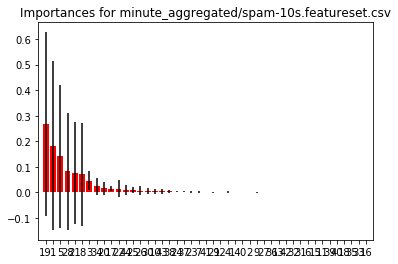

1 entropy_srcip
2 avg_duration
3 n_sports>1024
4 entropy_state
5 entropy_srcport
6 n_dports<1024
7 n_tcp
8 entropy_src_b_ip
9 entropy_dstip
10 normal_flow_count
11 entropy_dstport
12 entropy_dports<1024
13 std_time
14 std_srcbytes
15 entropy_sports>1024
16 n_s_b_p_address
17 entropy_packets
18 entropy_dst_c_ip
19 std_bytes
20 entropy_dst_b_ip
21 std_packets
22 n_dports>1024
23 entropy_bytes
24 src_to_dst
25 n_d_a_p_address
26 n_icmp
27 n_d_c_p_address
28 n_conn
29 n_udp
30 n_s_a_p_address
31 entropy_time
32 entropy_dst_a_ip
33 n_d_b_p_address
34 entropy_src_bytes
35 entropy_dports>1024
36 entropy_sports<1024
37 n_sports<1024
38 n_d_na_p_address
39 n_s_c_p_address
40 entropy_dst_na_ip
41 entropy_src_na_ip
42 background_flow_count
43 entropy_src_c_ip
44 entropy_src_a_ip
45 n_s_na_p_address


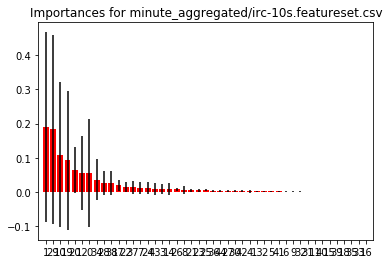

1 avg_duration
2 src_to_dst
3 n_s_b_p_address
4 entropy_srcip
5 entropy_dstip
6 n_d_a_p_address
7 n_conn
8 entropy_src_b_ip
9 entropy_state
10 entropy_dst_c_ip
11 normal_flow_count
12 entropy_dstport
13 entropy_dst_b_ip
14 n_dports>1024
15 std_bytes
16 entropy_packets
17 n_tcp
18 n_d_c_p_address
19 std_srcbytes
20 n_dports<1024
21 entropy_srcport
22 std_packets
23 std_time
24 entropy_dst_a_ip
25 entropy_dports<1024
26 entropy_time
27 entropy_sports>1024
28 entropy_src_bytes
29 n_icmp
30 n_d_b_p_address
31 n_udp
32 n_sports>1024
33 entropy_bytes
34 n_sports<1024
35 n_s_a_p_address
36 entropy_dports>1024
37 entropy_sports<1024
38 n_s_c_p_address
39 entropy_src_na_ip
40 n_d_na_p_address
41 entropy_dst_na_ip
42 background_flow_count
43 entropy_src_c_ip
44 entropy_src_a_ip
45 n_s_na_p_address


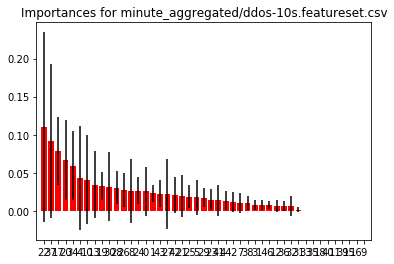

1 entropy_dstport
2 entropy_dst_b_ip
3 normal_flow_count
4 entropy_dstip
5 entropy_src_b_ip
6 n_icmp
7 n_s_b_p_address
8 n_d_b_p_address
9 entropy_srcip
10 entropy_sports>1024
11 entropy_state
12 std_srcbytes
13 n_dports<1024
14 std_bytes
15 n_conn
16 avg_duration
17 entropy_packets
18 entropy_time
19 entropy_src_bytes
20 entropy_srcport
21 std_time
22 n_sports>1024
23 src_to_dst
24 std_packets
25 entropy_bytes
26 entropy_dports<1024
27 n_udp
28 n_dports>1024
29 entropy_dst_c_ip
30 n_tcp
31 n_d_c_p_address
32 n_sports<1024
33 n_d_a_p_address
34 entropy_dst_a_ip
35 entropy_dports>1024
36 entropy_sports<1024
37 entropy_src_a_ip
38 entropy_src_c_ip
39 background_flow_count
40 entropy_src_na_ip
41 n_s_c_p_address
42 entropy_dst_na_ip
43 n_d_na_p_address
44 n_s_na_p_address
45 n_s_a_p_address


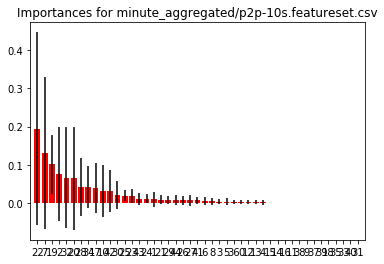

1 entropy_dstport
2 n_dports>1024
3 entropy_srcip
4 n_udp
5 entropy_dports>1024
6 entropy_dstip
7 entropy_state
8 entropy_src_b_ip
9 normal_flow_count
10 n_s_b_p_address
11 entropy_src_bytes
12 entropy_sports>1024
13 std_time
14 std_packets
15 entropy_packets
16 std_bytes
17 avg_duration
18 entropy_srcport
19 src_to_dst
20 entropy_dports<1024
21 std_srcbytes
22 entropy_time
23 entropy_bytes
24 n_sports<1024
25 n_dports<1024
26 n_tcp
27 n_sports>1024
28 entropy_dst_a_ip
29 n_conn
30 n_d_a_p_address
31 n_d_b_p_address
32 n_icmp
33 n_d_na_p_address
34 n_d_c_p_address
35 n_s_na_p_address
36 n_s_c_p_address
37 entropy_dst_c_ip
38 n_s_a_p_address
39 entropy_dst_b_ip
40 entropy_dst_na_ip
41 background_flow_count
42 entropy_src_c_ip
43 entropy_src_a_ip
44 entropy_src_na_ip
45 entropy_sports<1024


In [3]:
from plot_features import best_features
from botnet_detection import get_feature_labels, rf_train
from summarizer import Summarizer
import numpy as np

attacks = ['spam', 'irc', 'ddos', 'p2p']
files = ['minute_aggregated/{}-10s.featureset.csv'.format(attack) for attack in attacks]

for f in files:
    xtrain, xtest, ytrain, ytest = get_feature_labels(f)
    clf = rf_train(xtrain, ytrain)
    indices = best_features(clf, np.array(xtrain), f)
    features = Summarizer().features
    for i, index in enumerate(indices):
        print(i+1, features[index])